In [1]:
### RUN EVERY TIME: INITIALIZATION

import pandas as pd
from datetime import date, datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
### RUN EVERY TIME: GENERAL DATA PREPARATION

### Constants:
All = slice(None)
### HDF file with converted source data:
str_path_bb_idx_hdf = 'Data_Files/Source_Files/Bloomberg_Eco_Indices.h5'
str_key_flags = 'flags_exported' ### Acadian flags list
str_key_raw_filled = 'all_idx_raw_filled' ### Raw export with initial dates, dates gaps, absent date columns filled

Country                                                     US
Type                                                       CON
Category                                                  None
Name         US Personal Consumption Chained 2009 Dollars M...
Units                                                     Rate
Frequency                                                    M
Name: PCE CHNC Index, dtype: object


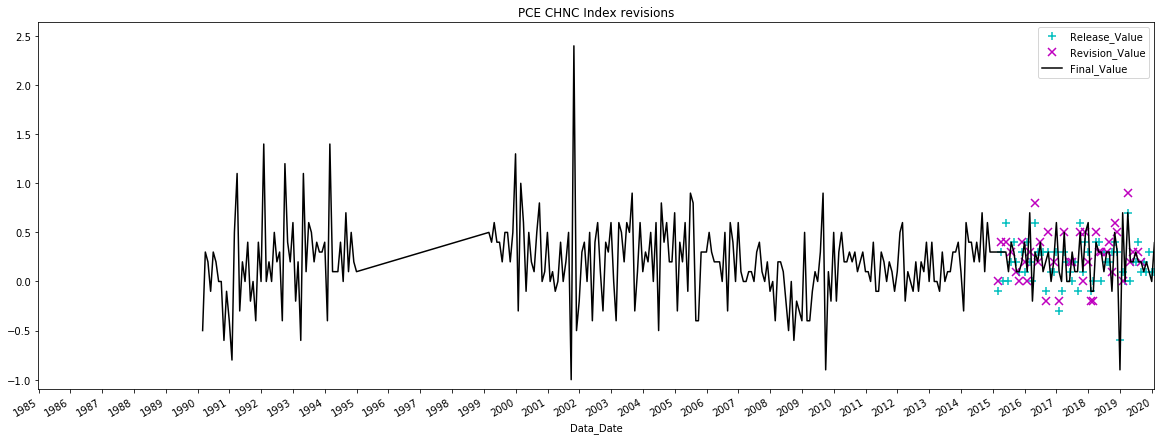

In [3]:
### RUN TO TESTING: FILLED ECO INDICES DATA PLOTTING TO VISUAL CONTROL

### Index choosing:
str_test_index = 'PCE CHNC Index'
### Data loading:
df_dates_filled = pd.read_hdf(str_path_bb_idx_hdf, key = str_key_raw_filled)[['Release_Value', 'Revision_Value', 'Final_Value']]
df_flags = pd.read_hdf(str_path_bb_idx_hdf, key = str_key_flags)
### Flags printing:
print(df_flags.loc[str_test_index, ['Country', 'Type', 'Category', 'Name', 'Units', 'Frequency']])
### Series creating:
df_eco_ind = df_dates_filled.loc[(str_test_index, All), All].droplevel(0)
date_xlim_start = df_eco_ind.index.min()
date_xlim_finish = df_eco_ind.index.max()
date_xlim_start = datetime(1984, 12, 31)
date_xlim_finish = datetime(2020, 1, 31)
flo_ylim_min = df_eco_ind.loc[date_xlim_start : date_xlim_finish, All].min().min()
flo_ylim_max = df_eco_ind.loc[date_xlim_start : date_xlim_finish, All].max().max()
tup_ylim = (flo_ylim_min - abs(flo_ylim_min) / 10, flo_ylim_max + abs(flo_ylim_max) / 10)
ax_eco_ind = df_eco_ind.plot(figsize = (20, 7.5), title = str_test_index + ' revisions', 
                style = ['c+', 'mx', 'k-'], markersize = 7.5, markeredgewidth = 1.5, 
                xlim = (date_xlim_start, date_xlim_finish), ylim = tup_ylim, x_compat = True)
ax_eco_ind.xaxis.set_major_locator(mdates.YearLocator(base = 1))                             
ax_eco_ind.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))                
plt.show() 